In [33]:
# Import library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go

In [34]:
# Load dataset
df = pd.read_csv("../data/ai_job_market.csv")

# Lihat 5 data teratas
df.head()

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain"
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow"
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn"
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow"
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain"


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_id            2000 non-null   int64 
 1   company_name      2000 non-null   object
 2   industry          2000 non-null   object
 3   job_title         2000 non-null   object
 4   skills_required   2000 non-null   object
 5   experience_level  2000 non-null   object
 6   employment_type   2000 non-null   object
 7   location          2000 non-null   object
 8   salary_range_usd  2000 non-null   object
 9   posted_date       2000 non-null   object
 10  company_size      2000 non-null   object
 11  tools_preferred   2000 non-null   object
dtypes: int64(1), object(11)
memory usage: 187.6+ KB


In [36]:
df.describe()

,job_id
count,2000.000000
mean,1000.500000
std,577.494589
min,1.000000
25%,500.750000
50%,1000.500000
75%,1500.250000
max,2000.000000


In [37]:
df['salary_range_usd'] = df['salary_range_usd'].str.replace(' ', '', regex=False)

In [38]:
df[['salary_min', 'salary_max']] = df['salary_range_usd'].str.split('-', expand=True)

In [39]:
df['salary_min'] = pd.to_numeric(df['salary_min'], errors='coerce')
df['salary_max'] = pd.to_numeric(df['salary_max'], errors='coerce')

In [40]:
df['salary_avg'] = (df['salary_min'] + df['salary_max']) / 2

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_id            2000 non-null   int64  
 1   company_name      2000 non-null   object 
 2   industry          2000 non-null   object 
 3   job_title         2000 non-null   object 
 4   skills_required   2000 non-null   object 
 5   experience_level  2000 non-null   object 
 6   employment_type   2000 non-null   object 
 7   location          2000 non-null   object 
 8   salary_range_usd  2000 non-null   object 
 9   posted_date       2000 non-null   object 
 10  company_size      2000 non-null   object 
 11  tools_preferred   2000 non-null   object 
 12  salary_min        2000 non-null   int64  
 13  salary_max        2000 non-null   int64  
 14  salary_avg        2000 non-null   float64
dtypes: float64(1), int64(3), object(11)
memory usage: 234.5+ KB


In [42]:
df.describe()

,job_id,salary_min,salary_max,salary_avg
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,95374.602000,150705.401000,123040.001500
std,577.494589,31882.260505,41716.198452,34776.200983
min,1.000000,40044.000000,54162.000000,47578.500000
25%,500.750000,68234.500000,120751.250000,94466.250000
50%,1000.500000,95440.000000,151337.500000,123202.750000
75%,1500.250000,123580.500000,182200.000000,151413.000000
max,2000.000000,149975.000000,247578.000000,197776.500000


In [43]:
df

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred,salary_min,salary_max,salary_avg
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain",92860,109598,101229.0
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow",78523,144875,111699.0
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn",124496,217204,170850.0
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow",50908,123743,87325.5
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain",98694,135413,117053.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,"Mueller, Ellis and Clark",Finance,NLP Engineer,"Flask, FastAPI, Power BI",Senior,Internship,"Washingtonmouth, SD",90382-110126,2024-04-22,Large,MLflow,90382,110126,100254.0
1996,1997,Roberts-Yu,Automotive,AI Product Manager,"R, Flask, Excel, C++, CUDA, Scikit-learn",Mid,Remote,"Joshuafort, ZA",47848-137195,2023-12-02,Large,"KDB+, LangChain, MLflow",47848,137195,92521.5
1997,1998,"Brooks, Williams and Randolph",Education,Data Analyst,"Hugging Face, Excel, Scikit-learn, R, MLflow",Entry,Contract,"West Brittanyburgh, CG",134994-180108,2023-10-29,Large,PyTorch,134994,180108,157551.0
1998,1999,Castaneda-Smith,Education,Quant Researcher,"AWS, Python, Scikit-learn",Senior,Contract,"Anthonyshire, OM",62388-82539,2024-08-10,Large,"MLflow, TensorFlow, FastAPI",62388,82539,72463.5


In [44]:
# Simpan hanya kolom yang dibutuhkan (ditambah salary_range_usd)
df = df[['job_id', 'industry', 'job_title', 'skills_required',
         'experience_level', 'posted_date', 'company_size',
         'salary_range_usd', 'salary_min', 'salary_max', 'salary_avg']]

print("\nKolom yang digunakan setelah pembersihan:")
print(df.columns.tolist())


Kolom yang digunakan setelah pembersihan:
['job_id', 'industry', 'job_title', 'skills_required', 'experience_level', 'posted_date', 'company_size', 'salary_range_usd', 'salary_min', 'salary_max', 'salary_avg']


In [45]:
# Cek missing value
print("Missing values per kolom:")
print(df.isnull().sum())

# Cek data duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())

Missing values per kolom:
job_id              0
industry            0
job_title           0
skills_required     0
experience_level    0
posted_date         0
company_size        0
salary_range_usd    0
salary_min          0
salary_max          0
salary_avg          0
dtype: int64

Jumlah data duplikat: 0


In [46]:
# Ubah kolom posted_date menjadi datetime
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')

# Ambil tahun dari posted_date
df['year'] = df['posted_date'].dt.year

# Lihat hasil
df[['posted_date', 'year']].head()

C:\Users\liyal\AppData\Local\Temp\ipykernel_24264\3964295501.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\liyal\AppData\Local\Temp\ipykernel_24264\3964295501.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,posted_date,year
0,2025-08-20,2025
1,2024-03-22,2024
2,2025-09-18,2025
3,2024-05-08,2024
4,2025-02-24,2025


In [47]:
def check_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"\nOutlier pada kolom {column}: {outliers.shape[0]} data")
    return outliers

# cek ketiga kolom gaji
out_salary_min = check_outliers('salary_min')
out_salary_max = check_outliers('salary_max')
out_salary_avg = check_outliers('salary_avg')


Outlier pada kolom salary_min: 0 data

Outlier pada kolom salary_max: 0 data

Outlier pada kolom salary_avg: 0 data


In [48]:
# Cek isi unik sebelum standarisasi
print("=== SEBELUM STANDARISASI ===\n")
print("Industry unik:")
print(df['industry'].unique()[:20])
print("\nJob Title unik:")
print(df['job_title'].unique()[:20])
print("\nExperience Level unik:")
print(df['experience_level'].unique())
print("\nContoh Skills:")
print(df['skills_required'].head(5).tolist())

=== SEBELUM STANDARISASI ===

Industry unik:
['Healthcare' 'Tech' 'Finance' 'E-commerce' 'Automotive' 'Education'
 'Retail']

Job Title unik:
['Data Analyst' 'Computer Vision Engineer' 'Quant Researcher'
 'AI Product Manager' 'Data Scientist' 'ML Engineer' 'NLP Engineer'
 'AI Researcher']

Experience Level unik:
['Mid' 'Senior' 'Entry']

Contoh Skills:
['NumPy, Reinforcement Learning, PyTorch, Scikit-learn, GCP, FastAPI', 'Scikit-learn, CUDA, SQL, Pandas', 'MLflow, FastAPI, Azure, PyTorch, SQL, GCP', 'Scikit-learn, C++, Pandas, LangChain, AWS, R', 'Excel, Keras, SQL, Hugging Face']


In [49]:
# Standarisasi kolom teks utama
df['industry'] = df['industry'].str.strip().str.lower()
df['job_title'] = df['job_title'].str.strip().str.lower()
df['skills_required'] = df['skills_required'].str.strip().str.lower()
df['experience_level'] = df['experience_level'].str.strip().str.lower()

# Hapus spasi ganda (regex)
for col in ['industry', 'job_title', 'experience_level']:
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)

C:\Users\liyal\AppData\Local\Temp\ipykernel_24264\1670395081.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\liyal\AppData\Local\Temp\ipykernel_24264\1670395081.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\liyal\AppData\Local\Temp\ipykernel_24264\1670395081.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [50]:
# Cek hasil setelah standarisasi
print("\n=== SETELAH STANDARISASI ===\n")

print("Industry unik:")
print(df['industry'].unique()[:20])

print("\nJob Title unik:")
print(df['job_title'].unique()[:20])

print("\nExperience Level unik:")
print(df['experience_level'].unique())

print("\nContoh Skills:")
print(df['skills_required'].head(5).tolist())


=== SETELAH STANDARISASI ===

Industry unik:
['healthcare' 'tech' 'finance' 'e-commerce' 'automotive' 'education'
 'retail']

Job Title unik:
['data analyst' 'computer vision engineer' 'quant researcher'
 'ai product manager' 'data scientist' 'ml engineer' 'nlp engineer'
 'ai researcher']

Experience Level unik:
['mid' 'senior' 'entry']

Contoh Skills:
['numpy, reinforcement learning, pytorch, scikit-learn, gcp, fastapi', 'scikit-learn, cuda, sql, pandas', 'mlflow, fastapi, azure, pytorch, sql, gcp', 'scikit-learn, c++, pandas, langchain, aws, r', 'excel, keras, sql, hugging face']


##Distribusi

In [51]:
# Cek tipe data
print(df[['salary_min', 'salary_max', 'salary_avg']].dtypes)

# Statistik deskriptif
df[['salary_min', 'salary_max', 'salary_avg']].describe()

salary_min      int64
salary_max      int64
salary_avg    float64
dtype: object


,salary_min,salary_max,salary_avg
count,2000.000000,2000.000000,2000.000000
mean,95374.602000,150705.401000,123040.001500
std,31882.260505,41716.198452,34776.200983
min,40044.000000,54162.000000,47578.500000
25%,68234.500000,120751.250000,94466.250000
50%,95440.000000,151337.500000,123202.750000
75%,123580.500000,182200.000000,151413.000000
max,149975.000000,247578.000000,197776.500000


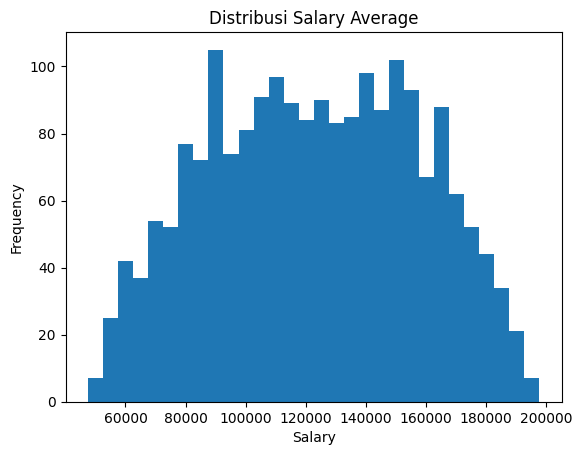

In [52]:
plt.hist(df['salary_avg'], bins=30)
plt.title("Distribusi Salary Average")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

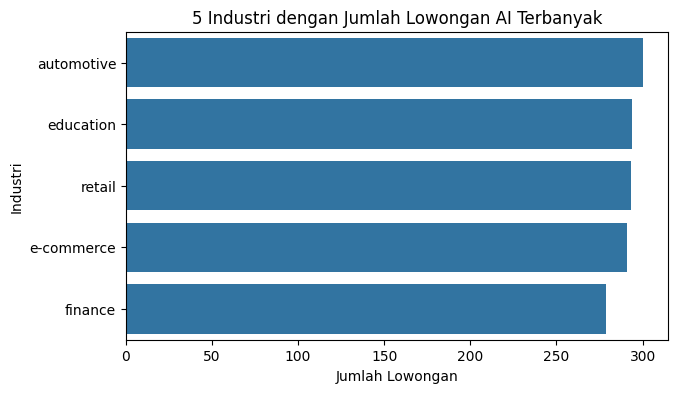

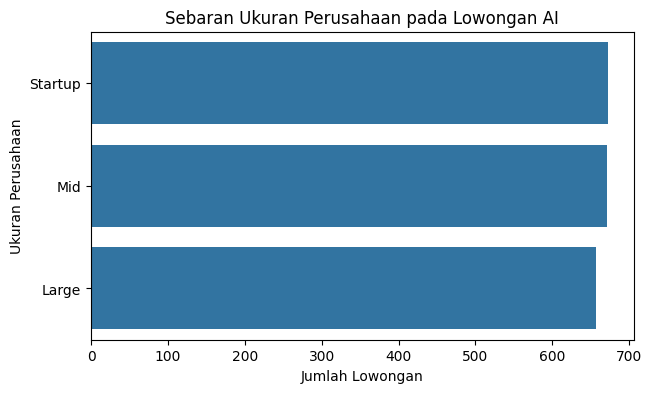

In [53]:
# --- 4️⃣ Distribusi umum kategori utama ---
plt.figure(figsize=(7,4))
sns.countplot(y='industry', data=df, order=df['industry'].value_counts().index[:5])
plt.title('5 Industri dengan Jumlah Lowongan AI Terbanyak')
plt.xlabel('Jumlah Lowongan')
plt.ylabel('Industri')
plt.show()

plt.figure(figsize=(7,4))
sns.countplot(y='company_size', data=df, order=df['company_size'].value_counts().index)
plt.title('Sebaran Ukuran Perusahaan pada Lowongan AI')
plt.xlabel('Jumlah Lowongan')
plt.ylabel('Ukuran Perusahaan')
plt.show()

**1. Bagaimana tren jumlah lowongan pekerjaan di bidang AI dari tahun ke tahun?**

In [54]:
import plotly.io as pio
pio.renderers.default = "browser"
df['year'] = pd.to_datetime(df['posted_date']).dt.year.astype(str)
trend = df.groupby('year').size().reset_index(name='jumlah_lowongan')

fig = px.line(trend, x='year', y='jumlah_lowongan', markers=True,
              title='Tren Jumlah Lowongan AI per Tahun',
              labels={'year':'Tahun','jumlah_lowongan':'Jumlah Lowongan'})
fig.show()

C:\Users\liyal\AppData\Local\Temp\ipykernel_24264\4192283873.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**2. Posisi pekerjaan apa yang paling banyak diminati atau paling sering dibuka di industri AI setiap tahunnya?**

In [55]:
# Ambil 10 job title terbanyak
top_jobs = df['job_title'].value_counts().nlargest(10).reset_index()
top_jobs.columns = ['job_title', 'count']

# Bar chart interaktif dengan warna custom
fig = px.bar(
    top_jobs,
    x='job_title',
    y='count',
    title='10 Posisi Pekerjaan AI Paling Sering Dibuka',
    labels={'job_title': 'Job Title', 'count': 'Jumlah Lowongan'},
    color='count',  # memberi warna berdasarkan jumlah (lebih variatif)
    color_continuous_scale='Viridis'  # bisa diganti misal: 'Plasma', 'Cividis', 'Turbo'
)

# Tampilan rapi
fig.update_layout(
    xaxis_tickangle=-45,
    template='plotly_white'
)

fig.show()

**3. Skill atau keahlian apa yang paling sering muncul sebagai persyaratan dalam lowongan pekerjaan AI?**

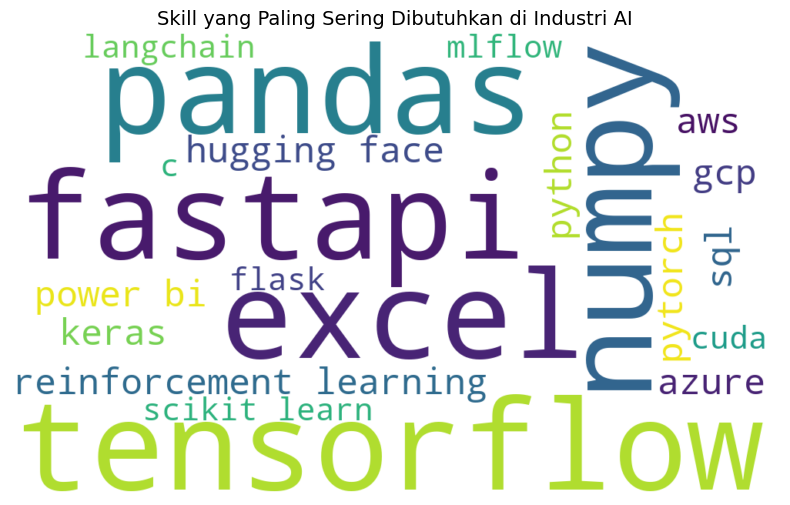

In [56]:
# Gabungkan skills dan tools
text = " ".join(df['skills_required'].astype(str))
# Buat Word Cloud
plt.figure(figsize=(10,6))
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skill yang Paling Sering Dibutuhkan di Industri AI', fontsize=14)
plt.show()

In [57]:
# Pecah skill menjadi list
skills_split = df['skills_required'].dropna().str.split(',')

# Flatten list
all_skills = [skill.strip() for sublist in skills_split for skill in sublist]

# Hitung frekuensi skill
skill_count = pd.Series(all_skills).value_counts().reset_index()
skill_count.columns = ['skill', 'count']

# Ambil 15 skill paling sering
top_skills = skill_count.head(15)

# Bar chart interaktif (horizontal)
fig = px.bar(
    top_skills,
    x='count',
    y='skill',
    orientation='h',
    title="15 Skill yang Paling Sering Dibutuhkan di Industri AI",
    color='count',
    color_continuous_scale='Viridis',
    labels={'skill': 'Skill', 'count': 'Frekuensi'}
)

# Pastikan skill paling banyak berada di paling atas
fig.update_yaxes(autorange="reversed")

fig.update_layout(template='plotly_white')
fig.show()

**4. Industri atau sektor apa yang mengalami peningkatan permintaan tenaga kerja AI paling tinggi?**

In [58]:
import plotly.express as px
import plotly.colors as colors

# Hitung jumlah lowongan berdasarkan tahun dan industri
industry_trend = df.groupby(['year', 'industry'])['job_id'].count().reset_index()

years = sorted(df['year'].unique())

# Ambil daftar industri unik
industries = sorted(df['industry'].unique())

# Buat warna viridis sesuai jumlah industri
viridis_colors = colors.sample_colorscale("Viridis", [i/(len(industries)-1) for i in range(len(industries))])

# Buat mapping warna tetap untuk industri
color_map = {industries[i]: viridis_colors[i] for i in range(len(industries))}

for y in years:
    subset = industry_trend[industry_trend['year'] == y].sort_values('job_id', ascending=False)

    fig = px.bar(
        subset,
        x='industry',
        y='job_id',
        color='industry',           # warna berdasarkan kategori agar konsisten
        color_discrete_map=color_map,  # warna tetap per industry
        title=f'Tren Lowongan AI Berdasarkan Industri – Tahun {y}',
        labels={'job_id': 'Jumlah Lowongan', 'industry': 'Industri'}
    )

    fig.update_xaxes(categoryorder='array', categoryarray=subset['industry'].tolist())
    fig.update_layout(showlegend=True)
    fig.show()

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 62866)
Traceback (most recent call last):
  File "C:\laragon\bin\python\python-3.10\lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\laragon\bin\python\python-3.10\lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "C:\laragon\bin\python\python-3.10\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\laragon\bin\python\python-3.10\lib\socketserver.py", line 747, in __init__
    self.handle()
  File "C:\laragon\bin\python\python-3.10\lib\http\server.py", line 432, in handle
    self.handle_one_request()
  File "C:\laragon\bin\python\python-3.10\lib\http\server.py", line 420, in handle_one_request
    method()
  File "c:\laragon\www\Dashboard\venv\lib\site-packages\plotly\io\_base_renderer

**5. Bagaimana hubungan antara level pengalaman (junior, mid, senior) dengan jumlah permintaan pekerjaan di bidang AI?**

In [59]:
# Hitung jumlah lowongan berdasarkan level pengalaman dan tahun
exp_heatmap = df.groupby(['experience_level', 'year']).size().reset_index(name='jumlah_lowongan')

# Buat pivot untuk heatmap
pivot_data = exp_heatmap.pivot(index='experience_level', columns='year', values='jumlah_lowongan')

# Heatmap dengan 1-tone Viridis
fig = go.Figure(data=go.Heatmap(
    z=pivot_data.values,
    x=pivot_data.columns.astype(str),
    y=pivot_data.index,
    colorscale='Viridis',   # satu tone seperti bar chart sebelumnya
    colorbar=dict(title='Jumlah Lowongan'),
    xgap=2,
    ygap=2
))

fig.update_layout(
    title='Hubungan Level Pengalaman dengan Jumlah Lowongan AI per Tahun',
    xaxis_title='Tahun',
    yaxis_title='Level Pengalaman',
    plot_bgcolor='white'
)

fig.show()

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 57433)
Traceback (most recent call last):
  File "C:\laragon\bin\python\python-3.10\lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\laragon\bin\python\python-3.10\lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "C:\laragon\bin\python\python-3.10\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\laragon\bin\python\python-3.10\lib\socketserver.py", line 747, in __init__
    self.handle()
  File "C:\laragon\bin\python\python-3.10\lib\http\server.py", line 432, in handle
    self.handle_one_request()
  File "C:\laragon\bin\python\python-3.10\lib\http\server.py", line 420, in handle_one_request
    method()
  File "c:\laragon\www\Dashboard\venv\lib\site-packages\plotly\io\_base_renderer

**6. Job title mana yang memiliki rata-rata gaji tertinggi dalam setiap level pengalaman (Entry, Mid, Senior)?**

In [60]:
# Hitung rata-rata gaji berdasarkan job_title dan experience_level
salary_job_exp = df.groupby(['job_title', 'experience_level'])['salary_avg'].mean().reset_index()

# Urutkan dari gaji tertinggi
salary_job_exp = salary_job_exp.sort_values('salary_avg', ascending=False)

# Warna Viridis 3 titik (ungu → hijau)
viridis_tone = {
    'entry':  '#440154',  # ungu gelap
    'mid':    '#fde725',  # kuning teran
    'senior': '#35b779'   # hijau terang
}

fig = px.bar(
    salary_job_exp,
    x='job_title',
    y='salary_avg',
    color='experience_level',
    color_discrete_map=viridis_tone,
    barmode='group',
    title='Rata-rata Gaji AI Berdasarkan Job Title dan Level Pengalaman',
    labels={
        'job_title': 'Job Title',
        'salary_avg': 'Rata-rata Gaji (USD)',
        'experience_level': 'Level Pengalaman'
    }
)

fig.update_layout(
    template='plotly_white',
    xaxis_tickangle=45
)

fig.show()

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 56715)
Traceback (most recent call last):
  File "C:\laragon\bin\python\python-3.10\lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\laragon\bin\python\python-3.10\lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "C:\laragon\bin\python\python-3.10\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\laragon\bin\python\python-3.10\lib\socketserver.py", line 747, in __init__
    self.handle()
  File "C:\laragon\bin\python\python-3.10\lib\http\server.py", line 432, in handle
    self.handle_one_request()
  File "C:\laragon\bin\python\python-3.10\lib\http\server.py", line 420, in handle_one_request
    method()
  File "c:\laragon\www\Dashboard\venv\lib\site-packages\plotly\io\_base_renderer

In [61]:
df.columns

Index(['job_id', 'industry', 'job_title', 'skills_required',
       'experience_level', 'posted_date', 'company_size', 'salary_range_usd',
       'salary_min', 'salary_max', 'salary_avg', 'year'],
      dtype='object')

In [65]:
# --- PENYESUAIAN PENTING: MENGUBAH KE TITLE CASE ---
# Terapkan str.lower().str.strip().str.title() ke kolom-kolom kategori:
df['experience_level'] = df['experience_level'].str.lower().str.strip().str.title()
df['job_title'] = df['job_title'].str.lower().str.strip().str.title()
df['company_size'] = df['company_size'].str.lower().str.strip().str.title()
df['industry'] = df['industry'].str.lower().str.strip().str.title()
df['skills_required'] = df['skills_required'].str.lower().str.strip().str.title()


C:\Users\liyal\AppData\Local\Temp\ipykernel_24264\1875549315.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\liyal\AppData\Local\Temp\ipykernel_24264\1875549315.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\liyal\AppData\Local\Temp\ipykernel_24264\1875549315.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [66]:
# --- 3. PENYIMPANAN DATA CLEAN KE FILE BARU (CSV) ---
print("\n--- Menyimpan data bersih ke CSV baru ---")
# Menggunakan path relatif untuk menyimpan di folder 'data'
# Jika skrip berada di folder 'scripts', gunakan '../data/'
# Jika skrip berada di luar folder 'scripts', gunakan './data/'
df.to_csv("../data/clean_ai_job_market.csv", index=False) 
print("File 'clean_ai_job_market.csv' berhasil disimpan di folder data.")


--- Menyimpan data bersih ke CSV baru ---
File 'clean_ai_job_market.csv' berhasil disimpan di folder data.
